In [4]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Preprocessing **

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[150.   142.   140.  ]
   [151.25 143.25 141.25]
   [147.75 139.75 137.75]
   ...
   [128.   114.   113.  ]
   [138.75 124.75 123.75]
   [146.25 132.25 131.25]]

  [[161.   153.   151.  ]
   [142.25 134.25 132.25]
   [136.25 128.25 126.25]
   ...
   [149.5  135.5  134.5 ]
   [139.75 125.75 124.75]
   [126.25 112.25 111.25]]

  [[130.75 122.75 120.75]
   [136.   128.   126.  ]
   [146.75 138.75 136.75]
   ...
   [134.   120.   119.  ]
   [134.   120.   119.  ]
   [138.5  124.5  123.5 ]]

  ...

  [[145.75 135.75 134.75]
   [161.5  151.5  150.5 ]
   [157.75 147.75 146.75]
   ...
   [140.5  128.5  132.5 ]
   [142.75 130.75 134.75]
   [156.75 144.75 148.75]]

  [[161.   151.   150.  ]
   [158.75 148.75 147.75]
   [151.25 141.25 140.25]
   ...
   [148.   136.   140.  ]
   [141.   129.   133.  ]
   [155.25 143.25 147.25]]

  [[165.25 155.25 154.25]
   [168.25 158.25 157.25]
   [141.25 131.25 130.25]
   ...
   [147.   135.   139.  ]
   [143.   131.   135.  ]
   [141.75 129.75 13

# **Building Model**

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()



**Building Convolution Layer**

In [11]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu',))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', ))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', ))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

**Output Layer**

In [20]:
model.add(Dense(units=38, activation='softmax'))

**Compiling Model**

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


I0000 00:00:1731078630.050221     114 service.cc:145] XLA service 0x7d271801a800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731078630.050272     114 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731078630.050276     114 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   3/2197 ━━━━━━━━━━━━━━━━━━━━ 2:20 64ms/step - accuracy: 0.0000e+00 - loss: 5.1684 

I0000 00:00:1731078642.348414     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 152s 62ms/step - accuracy: 0.4091 - loss: 2.0996 - val_accuracy: 0.8272 - val_loss: 0.5528
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 52ms/step - accuracy: 0.8416 - loss: 0.5075 - val_accuracy: 0.9074 - val_loss: 0.2980
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9027 - loss: 0.3001 - val_accuracy: 0.9379 - val_loss: 0.1959
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 52ms/step - accuracy: 0.9318 - loss: 0.2019 - val_accuracy: 0.9513 - val_loss: 0.1485
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9504 - loss: 0.1505 - val_accuracy: 0.9383 - val_loss: 0.2061
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9609 - loss: 0.1173 - val_accuracy: 0.9474 - val_loss: 0.1735
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9688 - loss: 0.0941 - val_accuracy: 0.9663 - val_loss: 0.1152
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 52ms/step - accuracy: 0.9753 - lo

# **Model Evaluation**

**Model Evaluation on training**

In [24]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9835 - loss: 0.0475


In [25]:
print(train_loss,train_acc)

0.04473334550857544 0.9845935106277466


**Model on validation set**

In [26]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9576 - loss: 0.1640


In [27]:
print(val_loss,val_acc)

0.15041282773017883 0.9579444527626038


In [28]:
model.save('/kaggle/working/training_model.h5')

In [29]:
training_history.history

{'accuracy': [0.6067572236061096,
  0.8628494143486023,
  0.9140194654464722,
  0.9388719201087952,
  0.955814778804779,
  0.9639946222305298,
  0.9707802534103394,
  0.9764990210533142,
  0.9795006513595581,
  0.9813215732574463],
 'loss': [1.3373384475708008,
  0.4358536899089813,
  0.2664124071598053,
  0.18452513217926025,
  0.1350870132446289,
  0.1077151894569397,
  0.08921697735786438,
  0.0710340067744255,
  0.06475897133350372,
  0.057431064546108246],
 'val_accuracy': [0.8271682262420654,
  0.9074094891548157,
  0.9379125833511353,
  0.9512861371040344,
  0.9383109211921692,
  0.9473594427108765,
  0.9662531018257141,
  0.9661962389945984,
  0.9620419144630432,
  0.9579444527626038],
 'val_loss': [0.5527701377868652,
  0.29798632860183716,
  0.19587159156799316,
  0.14853455126285553,
  0.20613804459571838,
  0.17345485091209412,
  0.1152133047580719,
  0.12241337448358536,
  0.13781876862049103,
  0.15041287243366241]}

In [30]:
#Recording history in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history,f)

In [31]:
training_history.history['accuracy']

[0.6067572236061096,
 0.8628494143486023,
 0.9140194654464722,
 0.9388719201087952,
 0.955814778804779,
 0.9639946222305298,
 0.9707802534103394,
 0.9764990210533142,
 0.9795006513595581,
 0.9813215732574463]

## Accuracy Visualization

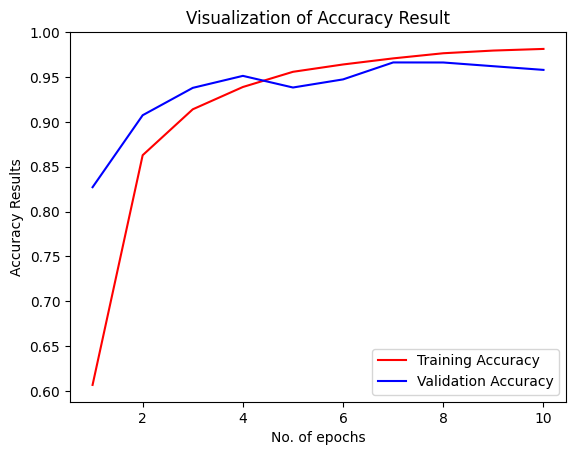

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Results")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

**Some other metrics for model Evaluation**

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step


(array([[9.9999332e-01, 9.3380026e-10, 1.7771110e-10, ..., 4.2859829e-15,
         1.5102763e-13, 1.6527720e-11],
        [9.9749762e-01, 1.4674593e-11, 4.7594040e-11, ..., 2.2257268e-12,
         9.5988408e-13, 9.5723401e-11],
        [9.9999988e-01, 2.8514438e-10, 1.5766763e-10, ..., 5.3821972e-17,
         5.1853544e-14, 1.9754150e-11],
        ...,
        [7.3795245e-14, 3.6828400e-15, 2.6045409e-11, ..., 6.1653385e-15,
         4.1642240e-13, 1.0000000e+00],
        [3.1752701e-13, 6.6547851e-15, 4.4738747e-11, ..., 3.9830761e-13,
         1.9737610e-12, 1.0000000e+00],
        [5.2176614e-12, 2.5073070e-13, 2.5547958e-12, ..., 6.8533478e-12,
         2.8767921e-09, 9.9997103e-01]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import classification_report

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.87      0.92       504
                                 Apple___Black_rot       1.00      0.94      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.91      0.98      0.94       502
                               Blueberry___healthy       0.99      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.85      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.98      0.

In [44]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[437,   0,   0, ...,   0,   0,   0],
       [  3, 468,   0, ...,   0,   1,   0],
       [  0,   0, 421, ...,   1,   2,   1],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   0, ...,   0,   0, 479]])

**Confusion Matrix Visualization**

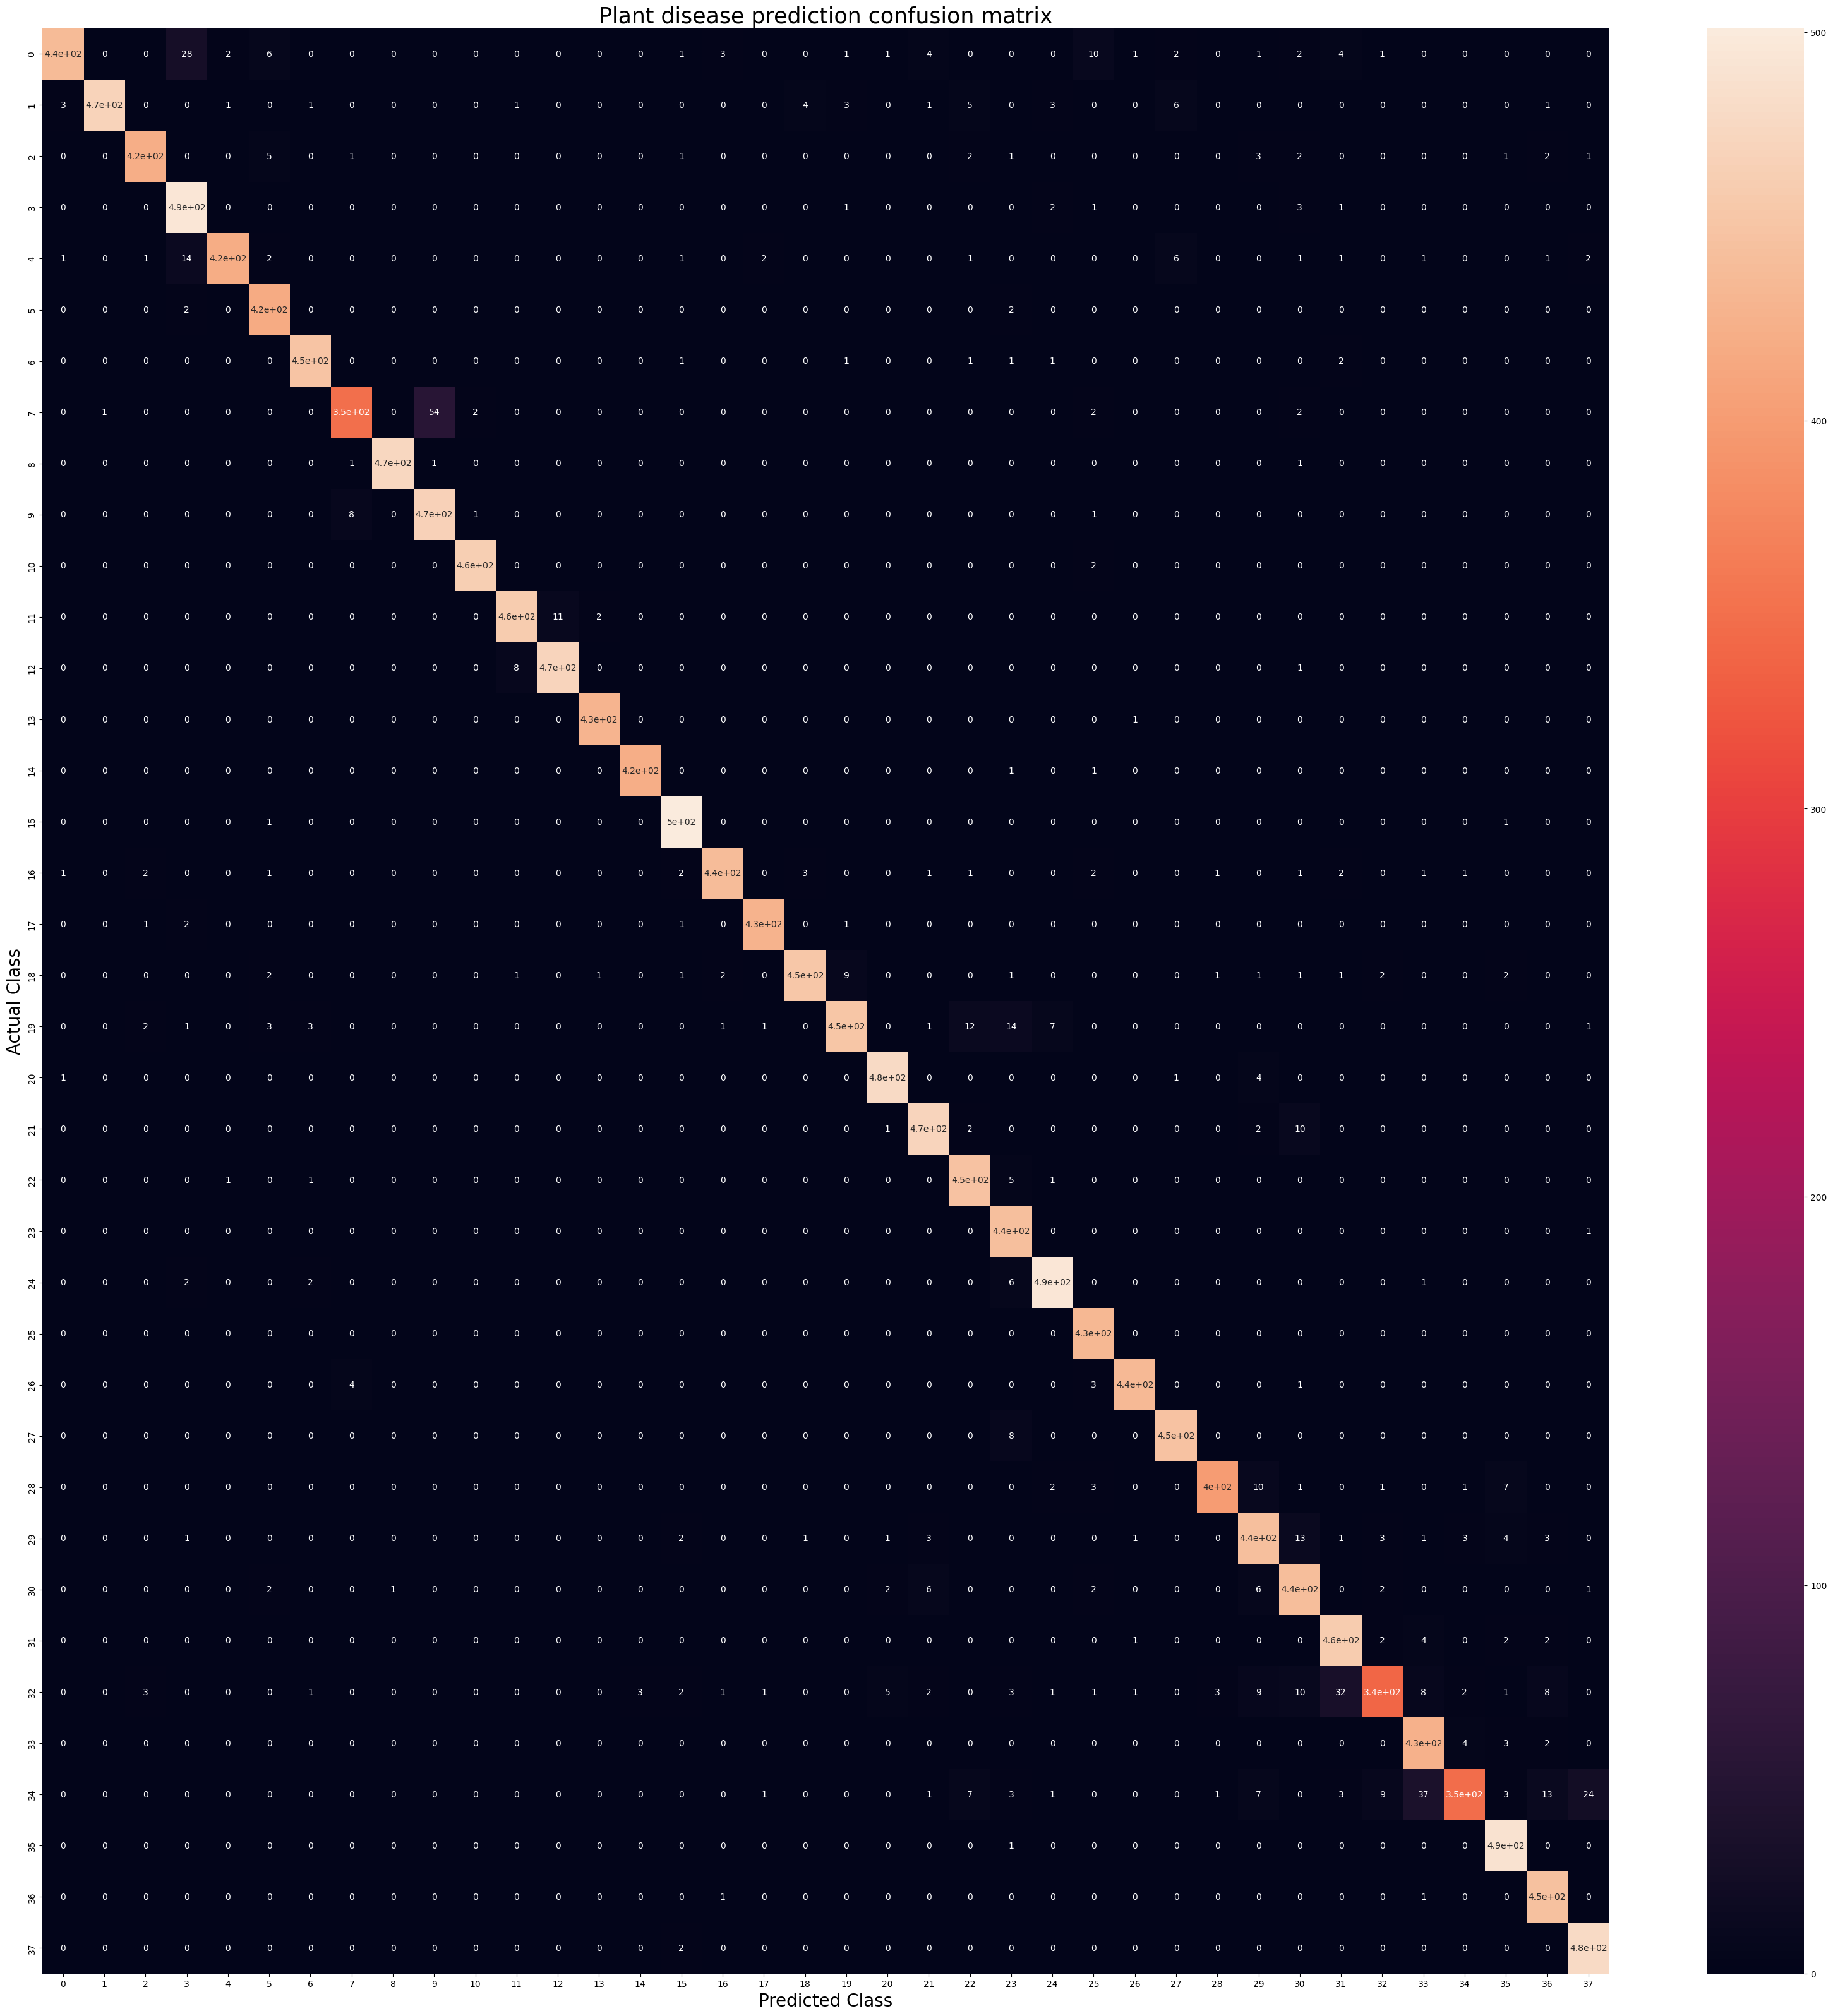

In [52]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant disease prediction confusion matrix",fontsize=25)
plt.show()